# <center> 10. Neotectonics of intraplate and mantle diapir regions</center>
# <center> Dynamic Topography</center>
## <center>Lab exercice</center>
## <center>Constanza Rodriguez Piceda (GFZ Potsdam -  University of Potsdam)</center>  

<center><img src='https://drive.google.com/uc?id=1WjeihxlqiNmx67Cp6OPT9PSqGUnUjQR8'></center>  
<center>Hogard et al. (2021)</center>


In this excercise we are going to calculate the residual topography (RT) of the Asia-Africa-Arabia-Europe domain using the workflow of Gvirtzman et al. (2016) paper.

<center><img src='https://drive.google.com/uc?id=1OpboANp9G8aM3k7sWing4umdtYOcL_t_'></center>
<center><img src='https://drive.google.com/uc?id=1d99d9UGYeJ2cKXHnS1vc8Zf7Hg2svqCO'></center>
  
  
References:
- Gvirtzman, Z., Faccenna, C., Becker, T. W., 2016. Isostasy, flexure, and dynamic topography. Tectonophysics, 683, 255–271.
- Hoggard, M.J., J. Austermann, C. Randel, & S. Stephenson, 2021. Observational estimates of dynamic topography through space and time, in Mantle convection and surface expressions (Eds: H. Marquardt, M. Ballmer, S. Cottaar, & J. Konter), AGU Geophysical Monograph Series, Washington, DC, Chapter 15. doi: 10.1002/9781119528609.ch15

In [1]:
'''
now that the missing packages were installed, we are going to import all the packages
'''
import os # for handling paths
import pandas as pd # data analysis 
import numpy as np # for working with arrays
from matplotlib import rcParams # for tunning plotting parameters
import matplotlib.pyplot as plt # for plotting
import cartopy.crs as ccrs # for handling projections
import matplotlib.cm as cm # for colorbar
import matplotlib.colors as colors # for colorbar
import warnings # for ignoring warnings

warnings.filterwarnings('ignore') # ignore future warnings when trying to plot coastlines

print('all packages were successfully installed')

all packages were successfully installed


In [2]:
'''
open the data
'''
topography=pd.read_csv('./data/topography.txt', 
                       sep=' ', 
                       usecols=[0,1,2], 
                       skiprows=1, 
                       names=['x','y','z']) # topography in meters
ds=pd.read_csv('./data/rho_sed.txt', 
               sep=' ', 
               usecols=[0,1,2], 
               skiprows=1, 
               names=['x','y','ds']) # sediment density in kg/m3
lc=pd.read_csv('./data/l_crust.txt', 
               sep=' ', 
               usecols=[0,1,2], 
               skiprows=1, 
               names=['x','y','lc']) # crustal thickness (crystalline crust+sediments) in km
ls=pd.read_csv('./data/l_sed.txt', 
               sep=' ', 
               usecols=[0,1,2], 
               skiprows=1,
               names=['x','y','ls']) # sediment thickness in km

topography.head() # show the first four rows of the topography data

,x,y,z
0,1.0,5.0,-3170
1,1.0,5.5,-1657
2,1.0,6.0,-9
3,1.0,6.5,83
4,1.0,7.0,159


In [3]:
''' 
define the constants
'''
dw=1030 # water density (kg/m3)
dasth=3190 # asthenosphere density (kg/m3)
tasth=1350 # temperature at lithospheric-asthenospheric boundary (LAB)
alpha=3.5e-5 # volume coefficient of thermal expansion
h0=2400 # meters - average topography at mid-ocean ridges in meters (Lachenbruch and Morgan, 1990)

print('constants defined succesfully')

constants defined succesfully


In [4]:
'''
change the data to SI units (from km to m)
'''
lc['lc']=lc['lc']*1000
ls['ls']=ls['ls']*1000
ds['ds']=ds['ds']*1000

print('changed to SI units succesfully')

changed to SI units succesfully


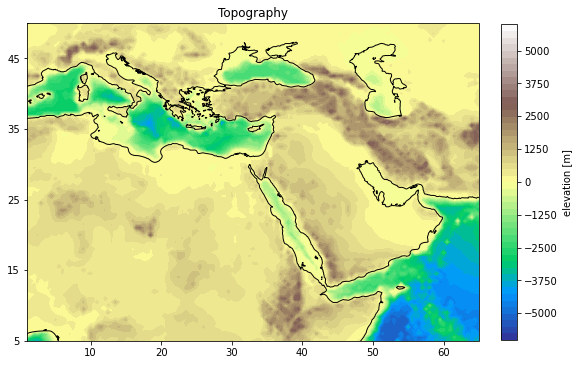

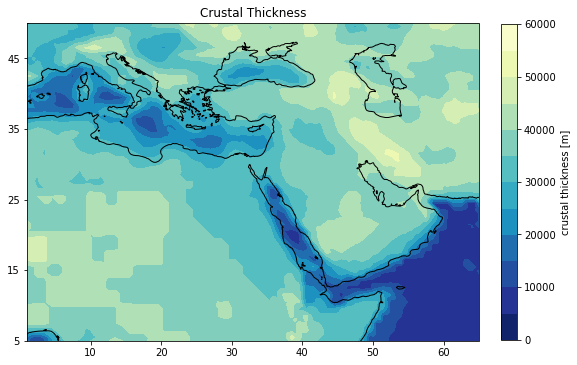

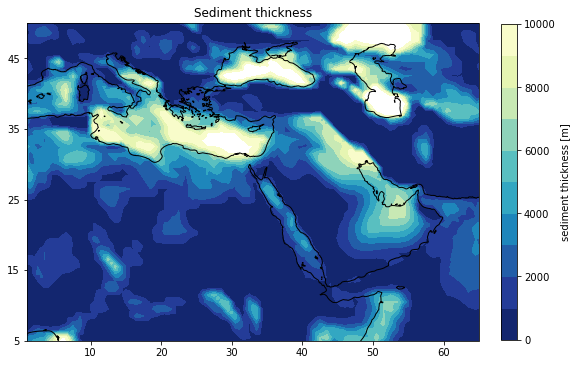

In [5]:
'''
plot topography, crustal thickness and sediment thickness
'''
# we need to grid the data first. This means to convert the data from a 1D array to a matrix with n*m dimensions
ny=topography['y'].idxmax()+1 # y dimension
nx=int(len(topography['y'])/ny) # x dimension

# now we can grid the data
gridx=np.reshape(topography['x'].values,(nx,ny)) #grid for x coordinates
gridy=np.reshape(topography['y'].values,(nx,ny)) # grid for y coordinates
gridtopo=np.reshape(topography['z'].values,(nx,ny)) # grid for residual topography
gridlc=np.reshape(lc['lc'].values,(nx,ny)) # grid for residual topography
gridls=np.reshape(ls['ls'].values,(nx,ny)) # grid for residual topography

# Initialize plot objects topography
projection = ccrs.PlateCarree(central_longitude=0) # set projection
fig1,ax1 =plt.subplots(figsize=(10,10), 
                      subplot_kw=dict(projection=projection)) # create 'canvas' of the plot

# plot data topography
levels = np.linspace(-6000, 6000, 49) # set contour levels
c1=ax1.contourf(gridx,gridy,gridtopo, levels, cmap=cm.terrain)
cbar=fig1.colorbar(c1, ax=ax1, pad=0.04, shrink=0.58, label='elevation [m]') # colorbar
ax1.set_xticks(np.linspace(10,60,6)) # set ticks in x
ax1.set_yticks(np.linspace(5,45,5)) # set ticks in y
ax1.coastlines() # add coastlines
ax1.set_title('Topography')

# Initialize plot crustal thickness
fig2,ax2 =plt.subplots(figsize=(10,10), 
                      subplot_kw=dict(projection=projection)) # create 'canvas' of the plot

# plot data crustal thickness
levels = np.linspace(0, 60000, 13) # set contour levels
c2=ax2.contourf(gridx,gridy,gridlc, levels, cmap=cm.YlGnBu_r)
cbar=fig1.colorbar(c2, ax=ax2, pad=0.04, shrink=0.58, label='crustal thickness [m]') # colorbar
ax2.set_xticks(np.linspace(10,60,6)) # set ticks in x
ax2.set_yticks(np.linspace(5,45,5)) # set ticks in y
ax2.set_title('Crustal Thickness')
ax2.coastlines() # add coastlines

# Initialize plot sediment thickness
fig3,ax3 =plt.subplots(figsize=(10,10), 
                      subplot_kw=dict(projection=projection)) # create 'canvas' of the plot


# plot data sediment thickness
levels = np.linspace(0, 10000, 11) # set contour levels
c3=ax3.contourf(gridx,gridy,gridls, levels, cmap=cm.YlGnBu_r)
cbar=fig1.colorbar(c3, ax=ax3, pad=0.04, shrink=0.58, label='sediment thickness [m]') # colorbar
ax3.set_xticks(np.linspace(10,60,6)) # set ticks in x
ax3.set_yticks(np.linspace(5,45,5)) # set ticks in y
ax3.set_title('Sediment thickness')
ax3.coastlines() # add coastlines
plt.show()


In [6]:
'''
calculate a correction factor to account for the water load
'''
acont=1 # for continent
asea=dasth/(dasth-dw) # for sea

In [7]:
'''
split the data between sea and continent area
'''
# calculate index for splitting
seaid=topography.index[topography['z']<0].values # index for sea
contid=topography.index[topography['z']>=0].values # index for continent

# filter data according to the sea and continent using index
x_sea=topography['x'].iloc[seaid] # coordinate x for sea
y_sea=topography['y'].iloc[seaid] # coordinate y for sea
topo_sea=topography['z'].iloc[seaid] # topography for sea
ds_sea=ds['ds'].iloc[seaid] # sediment density for sea
lc_sea=lc['lc'].iloc[seaid] # sediment thickness for sea
ls_sea=ls['ls'].iloc[seaid] # crustal thickness for sea

x_cont=topography['x'].iloc[contid] # coordinate x for continent
y_cont=topography['y'].iloc[contid] # coordinate y for continent
topo_cont=topography['z'].iloc[contid] # topography for continent
ds_cont=ds['ds'].iloc[contid] # sediment density for continent
lc_cont=lc['lc'].iloc[contid] # sediment thickness for continent
ls_cont=ls['ls'].iloc[contid] # crustal thickness for continent

In [8]:
'''
calculate the contribution of the crust to the topography (buoyancy)
'''
# substract the sediment thickness to the crust data to obtain the thickness of the crystalline crust
lcryst_cont=lc_cont-ls_cont # crystalline crust thickness (continent)
lcryst_sea=lc_sea-ls_sea # # crystalline crust thickness (sea)
 
# assume a crystalline crustal density of 2840 kg/m3 and a sediment density of 2450 kg/m3,
# calculate the average crustal density including the crystalline crust and the sediments
dcrust_ave_cont=(lcryst_cont*2840+ls_cont*2450)/(lcryst_cont+ls_cont) # crystalline crust thickness (continent)
dcrust_ave_sea=(lcryst_sea*2950+ls_sea*2450)/(lcryst_sea+ls_sea) # crystalline crust thickness (sea)

# calculate the contribution of the crust to the topography (buoyancy)
hc_cont=(dasth-dcrust_ave_cont)/dasth*lc_cont # bouyancy for sea
hc_sea=(dasth-dcrust_ave_sea)/dasth*lc_sea # buoyancy for continent

In [9]:
'''
calculate the residual topography
'''
RT_sea=topo_sea/asea+h0-hc_sea # residual topography for sea
RT_cont=topo_cont/acont+h0-hc_cont # residual topography for continent

In [10]:
'''
combine continent and sea data
'''
total_id=np.concatenate([seaid,contid]) # index
total_x=pd.concat([x_sea,x_cont]) # coordinate x
total_y=pd.concat([y_sea,y_cont]) # coordinate y
total_RT=pd.concat([RT_sea,RT_cont]) # total residual topography

table=pd.DataFrame({'id':total_id, 'x':total_x, 'y':total_y,'RT':total_RT}) # put all columns together
table=table.sort_values('id') # order columns by index

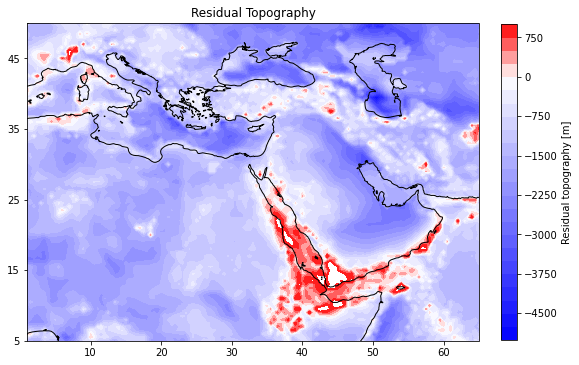

In [11]:
'''
plot residual topography
'''
# we need to grid the data first. This means to convert the data from a 1D array to a matrix with n*m dimensions
ny=table['y'].idxmax()+1 # y dimension
nx=int(len(total_y)/ny) # x dimension

# now we can grid the data
gridx=np.reshape(table['x'].values,(nx,ny)) #grid for x coordinates
gridy=np.reshape(table['y'].values,(nx,ny)) # grid for y coordinates
gridRT=np.reshape(table['RT'].values,(nx,ny)) # grid for residual topography

# Initialize plot objects
projection = ccrs.PlateCarree(central_longitude=0) # set projection
fig5,ax5 =plt.subplots(figsize=(10,10), 
                      subplot_kw=dict(projection=projection)) # create 'canvas' of the plot


# plot data
levels = np.linspace(-5000, 1000, 25) # set contour levels

# make the norm:  Note the center is offset so that the negative RT has more
# dynamic range:
divnorm = colors.TwoSlopeNorm(vmin=-5000, vcenter=0, vmax=1000)

c5=ax5.contourf(gridx,gridy,gridRT, levels, cmap=cm.bwr, norm=divnorm)

cbar=fig5.colorbar(c5, ax=ax5, pad=0.04, shrink=0.58, label='Residual topography [m]') # colorbar
ax5.set_xticks(np.linspace(10,60,6)) # set ticks in x
ax5.set_yticks(np.linspace(5,45,5)) # set ticks in y
ax5.set_title('Residual Topography')
ax5.coastlines() # add coastlines
plt.show()